In [1]:
import os 
dir_primary = 'F:/UrbanDataProject/land_surface_temperature/code/analysis'
# os.chdir('/home/tml/research/land_surface_temperature/code/analysis')
os.chdir(dir_primary)
from analysis import *
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
code_dir = os.getcwd()
os.chdir('../..')


# Import data

In [2]:
cities = ['bal', 'por', 'det', 'phx']
# import data
grid_size = 100
df = import_data(grid_size)

# Variable importance

In [3]:
calculate_partial_dependence(df, grid_size)

lst_day_mean


f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


lst_night_mean


f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [3]:
# import results
results_pd = pd.read_csv('data/regression/results_partial_dependence_{}.csv'.format(grid_size))

In [5]:
results_pd.head()

,Unnamed: 0,boot,dependent,independent,mean,model,x
0,0,NaN,lst_day_mean,ndvi_mean,1.954265,gbrt,-1.389741
1,1,NaN,lst_day_mean,ndvi_mean,1.135627,rf,-1.389741
2,2,NaN,lst_day_mean,ndvi_mean,3.580081,mars,-1.389741
3,3,NaN,lst_day_mean,ndvi_mean,3.655136,gam,-1.389741
4,4,NaN,lst_day_mean,ndvi_mean,4.403085,mlr,-1.389741


In [6]:
# calculate the swing
calc_swing(results_pd, grid_size)

In [3]:
# import swing results
results_swing = pd.read_csv('data/regression/results_swing_{}.csv'.format(grid_size))

In [8]:
results_swing.head()

,Unnamed: 0,independent,swing,model,dependent
0,0,alb_mean,0.101408,gam,lst_day_mean
1,1,bldg,0.043375,gam,lst_day_mean
2,2,dsm_mean,0.054201,gam,lst_day_mean
3,3,dsm_sd,0.037041,gam,lst_day_mean
4,4,lcov_11,0.244536,gam,lst_day_mean


f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


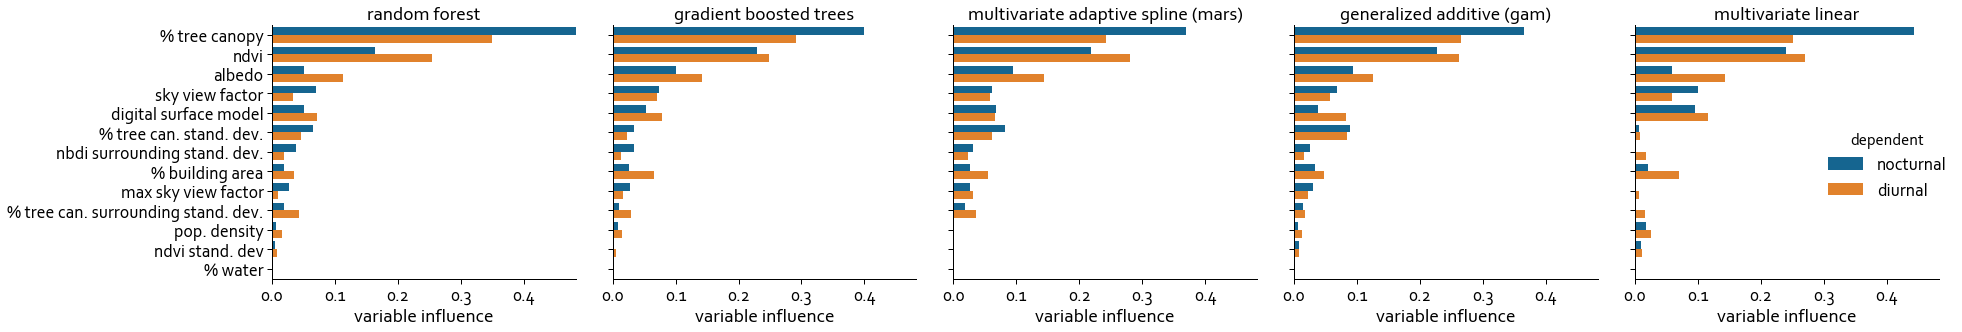

['% tree canopy',
 'ndvi',
 'albedo',
 'sky view factor',
 'digital surface model',
 '% tree can. stand. dev.',
 'nbdi surrounding stand. dev.',
 '% building area',
 'max sky view factor',
 '% tree can. surrounding stand. dev.',
 'pop. density',
 'ndvi stand. dev',
 '% water']

<Figure size 432x288 with 0 Axes>

In [4]:
# plot
plot_importance(results_swing, grid_size)